In [ ]:
# importamos las libreria 
import pandas as pd  # para manipulacion de datos y datafreme

import matplotlib.pyplot as plt  # para visualizacion de datos 

import seaborn as sns  # para mejorar los graficos 

In [3]:
# creamos el datafreme para poder amanipular los datos
df = pd.read_csv("vgsales.csv") 

df.head() # para mostrar una vista prebia de los datos

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [13]:
# creare un filtro del datafreme para identificar cuales son los juegos mas ventido desdde 2013 asta 2016
df_filt = df[df["Year"] >= 2013][["Rank", "Name", "Platform", "Year", "Genre", "Publisher", "Global_Sales"]] 

df_filt.head() # mostramos vista previa

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
14238,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,21.40
14239,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,16.38
14240,33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,Nintendo,14.35
14241,62,Call of Duty: Ghosts,X360,2013,Shooter,Activision,10.21
14242,68,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,9.59


In [ ]:
# top 10 juegos mas vendidos desde 2013 a 2016
juegos = df_filt.groupby("Name")["Global_Sales"].sum().reset_index() # agrupamos por los nombre de juego y sumamos y con reset_index() devolvemos las columnas

juegos = juegos.sort_values(by="Global_Sales", ascending=False).head(10) # ordenamo de manera decendente para visualisar mejor

juegos # mostramos

,Name,Global_Sales
394,Grand Theft Auto V,55.92
120,Call of Duty: Ghosts,27.38
119,Call of Duty: Black Ops 3,25.32
614,Minecraft,23.73
118,Call of Duty: Advanced Warfare,21.90
301,FIFA 15,19.02
300,FIFA 14,17.14
302,FIFA 16,16.44
742,Pokemon X/Pokemon Y,14.35
87,Battlefield 4,14.03


In [20]:
# años con mayores ventas 
años = df_filt.groupby("Year")["Global_Sales"].sum().reset_index() # agrupamos por años 

años = años.sort_values(by="Year", ascending=True) # ordenamos por años

años # mostramos

,Year,Global_Sales
0,2013,368.11
1,2014,337.05
2,2015,264.44
3,2016,70.93


In [ ]:
# genero de juegos con mayores ventas 
genero = df_filt.groupby("Genre")["Global_Sales"].sum().reset_index() # agrupamos por genero

genero = genero.sort_values(by="Global_Sales", ascending=False) # ordenamos por ventas global

genero # mostramos 

,Genre,Global_Sales
0,Action,314.85
8,Shooter,213.17
10,Sports,144.35
7,Role-Playing,133.98
3,Misc,62.19
4,Platform,42.13
6,Racing,39.29
2,Fighting,35.00
1,Adventure,22.51
9,Simulation,20.23


In [ ]:
# top 10 plataforma con mayores ventas 

plataf = df_filt.groupby("Platform")["Global_Sales"].sum().reset_index() # agrupamos por juegos

plataf = plataf.sort_values(by="Global_Sales", ascending=False).head(10) # ordenamos por venta global y limitamos a 10

plataf # mostramos

,Platform,Global_Sales
4,PS4,278.07
3,PS3,189.16
10,XOne,141.06
9,X360,139.91
0,3DS,132.61
8,WiiU,64.02
6,PSV,37.93
2,PC,36.89
7,Wii,15.35
5,PSP,3.55


C:\Users\kelvin\AppData\Local\Temp\ipykernel_11084\4167143145.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=juegos, y="Name", x="Global_Sales", ax=axes[0, 0], palette="Blues_d")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_11084\4167143145.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
C:\Users\kelvin\AppData\Local\Temp\ipykernel_11084\4167143145.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genero, y="Genre", x="Global_Sales", ax=axes[1, 0], palette="Blues_d")
C:\Users\kelvin\AppData\Local\Temp\ipykernel_110

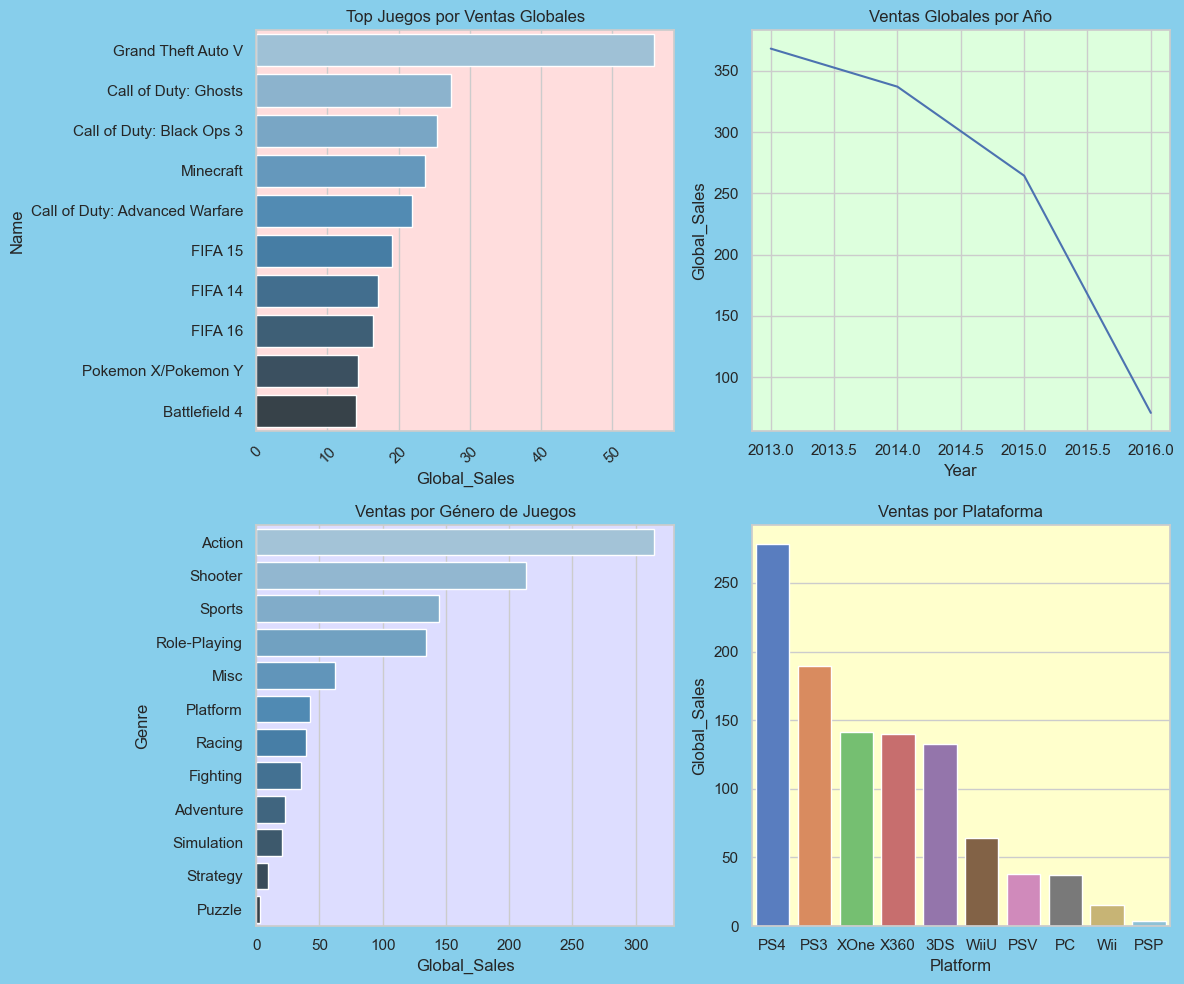

In [36]:
# Establecemos el estilo
sns.set(style="whitegrid")

# Creamos una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(12, 10), facecolor="skyblue")

# Colores de fondo para cada gráfico
colores_fondo = ["#ffdddd", "#ddffdd", "#ddddff", "#ffffcc"]  # Tonos suaves

# Gráfico de barras de juegos más vendidos
sns.barplot(data=juegos, y="Name", x="Global_Sales", ax=axes[0, 0], palette="Blues_d")
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)
axes[0, 0].set_title("Top Juegos por Ventas Globales")
axes[0, 0].set_facecolor(colores_fondo[0])  # Fondo personalizado

# Gráfico de líneas de ventas globales por año
sns.lineplot(data=años, x="Year", y="Global_Sales", ax=axes[0, 1])
axes[0, 1].set_title("Ventas Globales por Año")
axes[0, 1].set_facecolor(colores_fondo[1])

# Gráfico de barras de ventas por género
sns.barplot(data=genero, y="Genre", x="Global_Sales", ax=axes[1, 0], palette="Blues_d")
axes[1, 0].set_title("Ventas por Género de Juegos")
axes[1, 0].set_facecolor(colores_fondo[2])

# Gráfico de barras de ventas por plataforma
sns.barplot(data=plataf, x="Platform", y="Global_Sales", ax=axes[1, 1], palette="muted")
axes[1, 1].set_title("Ventas por Plataforma")
axes[1, 1].set_facecolor(colores_fondo[3])

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()
plt.show()
